###  Laptop Price Prediction using PyCaret

In [ ]:
# Import required libraries
import pandas as pd
from pycaret.regression import *

### Load and Explore the Data

In [ ]:
df = pd.read_csv("MySteps.csv")


In [ ]:
print(df.head())


   Full_date   Day_Name  steps Activity  distance  runDistance  calories  \
0   1-May-16     Sunday   3869      Low      2651            0       244   
1   8-May-16     Sunday   4088      Low      3119            0       197   
2   9-May-16     Monday   1958      Low      1266            0       134   
3  11-May-16  Wednesday   2569      Low      1661            0       198   
4  13-May-16     Friday   4276      Low      2809            0       251   

   Year Month Name  DayType Full_date (Quarter)  Full_date (Month Index)  \
0  2016        May  Weekend                Qtr2                        5   
1  2016        May  Weekend                Qtr2                        5   
2  2016        May  Weekday                Qtr2                        5   
3  2016        May  Weekday                Qtr2                        5   
4  2016        May  Weekday                Qtr2                        5   

  Full_date (Month)  deepSleepTime  shallowSleepTime  wakeTime       start  \
0       

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Full_date                2454 non-null   object
 1   Day_Name                 2454 non-null   object
 2   steps                    2454 non-null   int64 
 3   Activity                 2454 non-null   object
 4   distance                 2454 non-null   int64 
 5   runDistance              2454 non-null   int64 
 6   calories                 2454 non-null   int64 
 7   Year                     2454 non-null   int64 
 8   Month Name               2454 non-null   object
 9   DayType                  2454 non-null   object
 10  Full_date (Quarter)      2454 non-null   object
 11  Full_date (Month Index)  2454 non-null   int64 
 12  Full_date (Month)        2454 non-null   object
 13  deepSleepTime            2454 non-null   int64 
 14  shallowSleepTime         2454 non-null  

In [ ]:
print(df.describe().T)

                          count         mean          std     min      25%  \
steps                    2454.0  8262.905460  6666.920001     0.0  3225.00   
distance                 2454.0  5955.612469  4872.125039     0.0  2227.00   
runDistance              2454.0   826.986553  1826.378002     0.0   153.00   
calories                 2454.0   240.008150   213.678332     0.0    90.00   
Year                     2454.0  2019.165037     1.950693  2016.0  2017.25   
Full_date (Month Index)  2454.0     6.685412     3.419754     1.0     4.00   
deepSleepTime            2454.0   106.537897    72.531236     0.0    58.00   
shallowSleepTime         2454.0   234.849633   132.166576     0.0   187.00   
wakeTime                 2454.0     4.307661    24.557135     0.0     0.00   

                            50%       75%      max  
steps                    6983.0  11046.00  38443.0  
distance                 5010.0   7994.00  29485.0  
runDistance               296.0    600.00  21952.0  
calorie

In [ ]:
# Convert 'Full_date' to datetime if it's not already
df['Full_date'] = pd.to_datetime(df['Full_date'], errors='coerce')

# Check the data types of the columns
print(df.dtypes)


Full_date                  datetime64[ns]
Day_Name                           object
steps                               int64
Activity                           object
distance                            int64
runDistance                         int64
calories                            int64
Year                                int64
Month Name                         object
DayType                            object
Full_date (Quarter)                object
Full_date (Month Index)             int64
Full_date (Month)                  object
deepSleepTime                       int64
shallowSleepTime                    int64
wakeTime                            int64
start                              object
stop                               object
dtype: object


In [ ]:
categorical_cols = ['Activity', 'Day_Name', 'DayType', 'Month Name']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [ ]:

exp1 = setup(df, target='calories', session_id=123)


,Description,Value
0,Session id,123
1,Target,calories
2,Target type,Regression
3,Original data shape,"(2454, 18)"
4,Transformed data shape,"(2454, 53)"
5,Transformed train set shape,"(1717, 53)"
6,Transformed test set shape,"(737, 53)"
7,Numeric features,8
8,Date features,1
9,Categorical features,8


In [ ]:
df['Day_Name'] = df['Day_Name'].astype('category')
df['Activity'] = df['Activity'].astype('category')
df['DayType'] = df['DayType'].astype('category')
df['Month Name'] = df['Month Name'].astype('category')



### Try creating a basic linear regression model

In [ ]:

lr_model = create_model('lr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51.1346,10460.5036,102.2766,0.8130,0.4738,0.2476
1,52.2768,10226.8992,101.1281,0.7771,0.3155,0.2345
2,52.4552,9014.6105,94.9453,0.8154,0.5070,0.2584
3,46.5037,7089.3779,84.1984,0.8389,0.3561,0.3442
4,45.7081,7245.3786,85.1198,0.8106,0.3823,0.1992
5,40.9644,5263.2492,72.5483,0.8679,0.4824,0.2182
6,50.8479,9723.0024,98.6053,0.7247,0.4411,0.2575
7,47.5406,8426.8591,91.7979,0.8082,0.4801,0.2971
8,42.8251,5401.4460,73.4945,0.8467,0.4390,0.3448


In [ ]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,41.2964,7412.4581,84.8035,0.8219,0.4052,0.2191,0.1320
br,Bayesian Ridge,46.8222,7577.0355,85.8398,0.8188,0.4433,0.2648,0.0150
lr,Linear Regression,47.0257,7608.8479,86.1010,0.8177,0.4355,0.2633,0.0170
lasso,Lasso Regression,47.0279,7608.4247,86.0985,0.8177,0.4346,0.2628,0.0180
ridge,Ridge Regression,47.0257,7608.8478,86.1010,0.8177,0.4355,0.2633,0.0190
en,Elastic Net,47.0283,7608.4758,86.0993,0.8177,0.4346,0.2628,0.0190
llar,Lasso Least Angle Regression,47.0242,7608.5874,86.0983,0.8177,0.4355,0.2634,0.0210
catboost,CatBoost Regressor,42.1997,7646.0405,86.1846,0.8165,0.3775,0.2225,1.1680
lar,Least Angle Regression,47.0111,7650.6871,86.3329,0.8165,0.4551,0.2751,0.0180
lightgbm,Light Gradient Boosting Machine,44.8933,7900.1476,87.5177,0.8112,0.3730,0.2196,0.1660


### Evaluating the best model using various plots

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

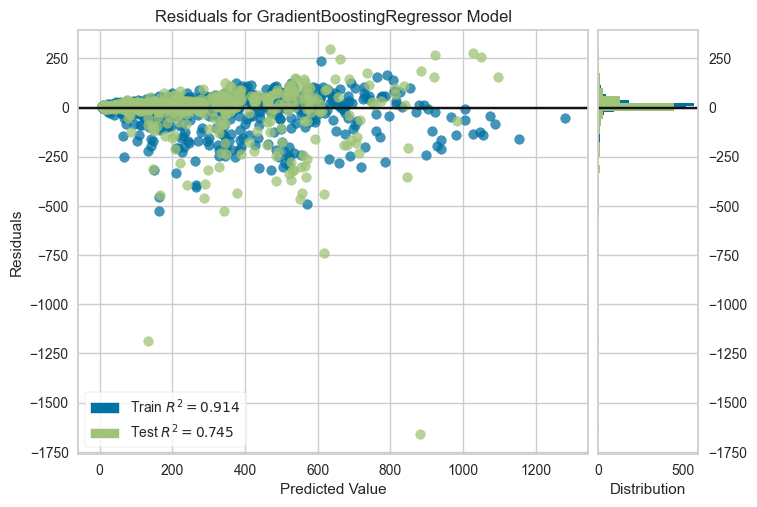

In [ ]:
plot_model(best_model, plot='residuals')


In [ ]:
final_model = finalize_model(best_model)


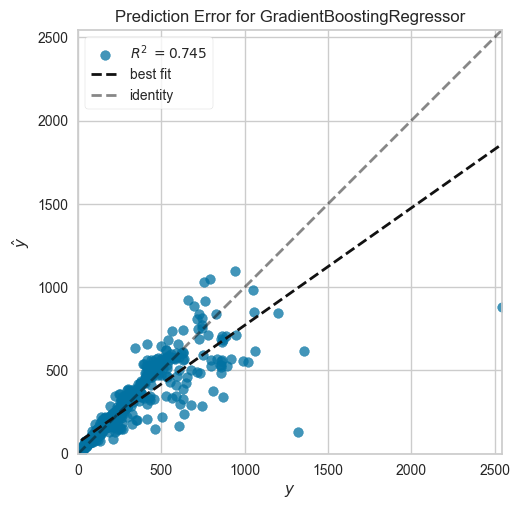

In [ ]:
plot_model(best_model, plot='error')



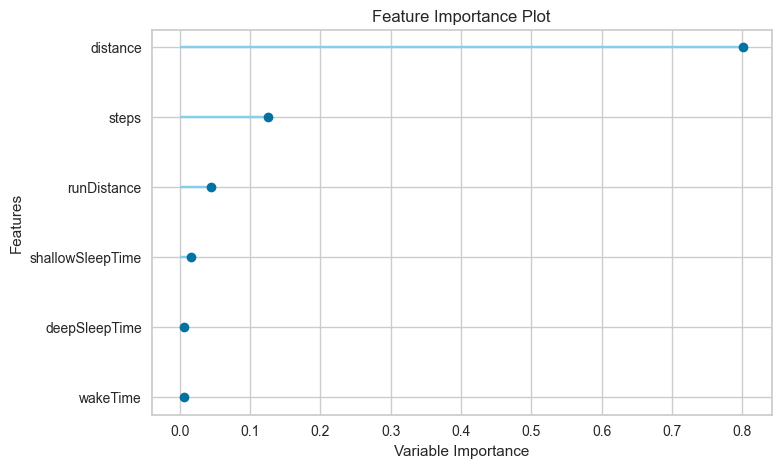

In [ ]:
plot_model(best_model, plot='feature')


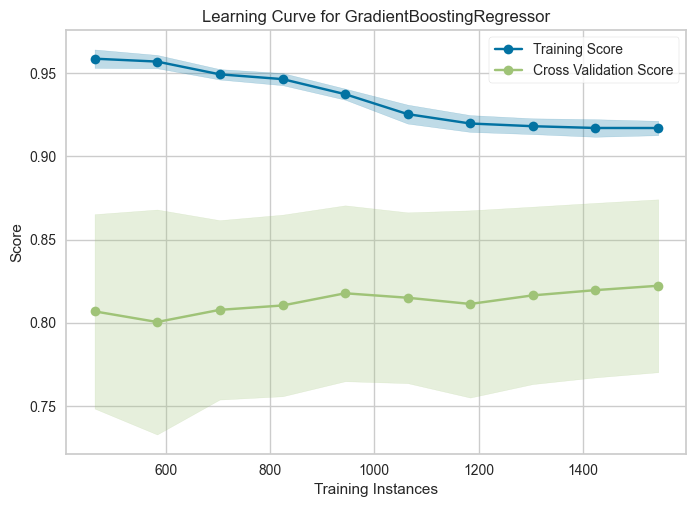

In [ ]:
plot_model(best_model, plot='learning')


### Tuning the best model

In [ ]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,53.5010,13269.3149,115.1925,0.7628,0.4161,0.2179
1,54.6313,12147.3785,110.2151,0.7353,0.3923,0.2530
2,56.8381,11131.4931,105.5059,0.7721,0.5659,0.4770
3,46.7956,7606.2567,87.2139,0.8271,0.3840,0.2741
4,48.1153,7358.0486,85.7791,0.8077,0.4468,0.2770
5,41.7674,6149.7139,78.4201,0.8457,0.4032,0.2078
6,55.0638,12508.2306,111.8402,0.6458,0.3764,0.2071
7,54.7790,11553.7411,107.4883,0.7370,0.4364,0.3242
8,44.6036,7007.8306,83.7128,0.8011,0.4139,0.3117


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Re-evaluating the tuned model with the same set of plots

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Making predictions with the tuned model

In [ ]:
predictions = predict_model(tuned_model, df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,35.5244,6692.3890,81.8070,0.8534,0.3759,0.1760


### Extracting model parameters

In [ ]:
print(tuned_model.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 123, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


### Assuming 'tuned_model' is your tuned model

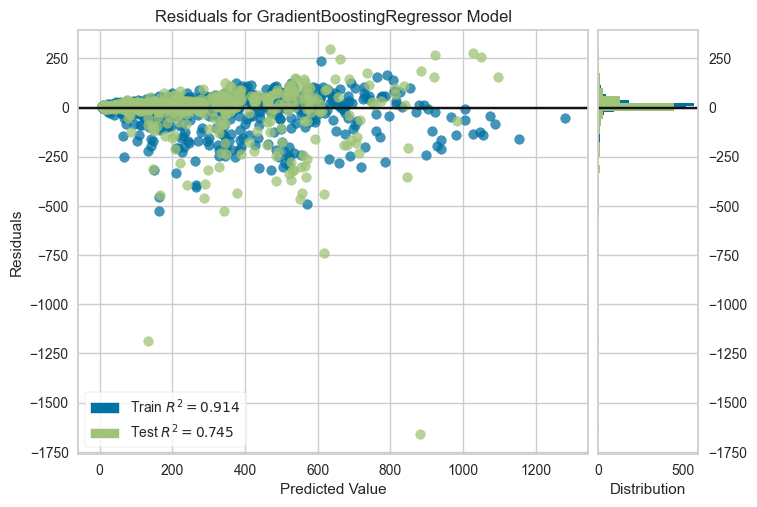

In [ ]:
plot_model(tuned_model)


### Plotting the prediction error plot for the tuned model

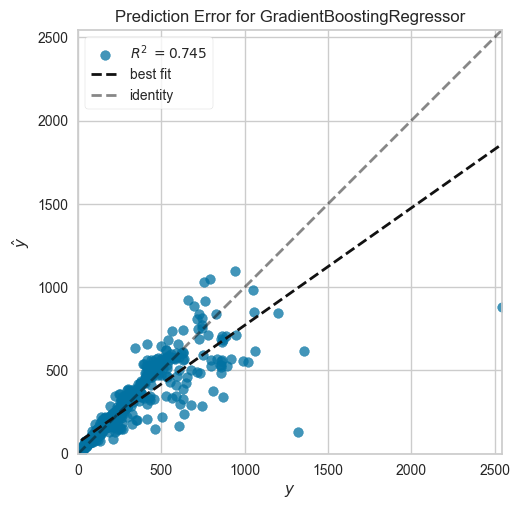

In [ ]:
plot_model(tuned_model, plot='error')


### Plotting the feature importance plot for the tuned model

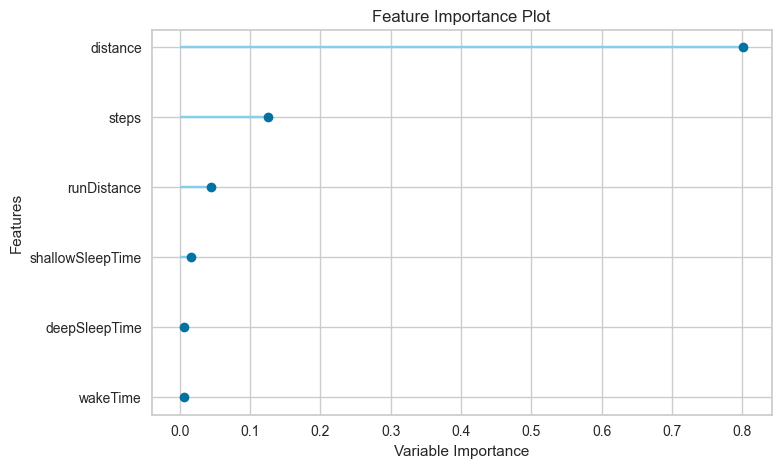

In [ ]:
plot_model(tuned_model, plot='feature')


### Extracting model parameters

In [ ]:
print(tuned_model.get_params())


{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 123, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
model_metrics = pull()
print(model_metrics)

                         Model      MAE       MSE    RMSE      R2   RMSLE  \
0  Gradient Boosting Regressor  35.5244  6692.389  81.807  0.8534  0.3759   

    MAPE  
0  0.176  
